In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy import signal
from scipy import stats

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
matplotlib.rc('pdf', fonttype=42)

In [242]:
def fftWelch(r):
    # Welch method for frequency
    f, Pxx = signal.welch(x= r,
                          fs=100.0, 
                          window='hanning',
                          nperseg = round(len(r)/5),
                          return_onesided=True, 
                          scaling='density')
    return(f, Pxx)

In [250]:
mothID = 'c-10_m15'
visit = 'FirstVisit/'

path = os.path.join('../dataFolders/PaperPipelineOutput/v3/RadiusAndAngle/', visit)
mothpath = glob.glob(path + mothID + '_*.csv')[0]

data = pd.read_csv(mothpath)

r = data.radial_distance_normalized.values
r[r > 2.5] = np.nan

s = np.split(r, np.where(np.isnan(r))[0]+1)
nanFreeSeg = max(s, key = len)

f, Pxx = fftWelch(nanFreeSeg)
max_f = f[np.argmax(Pxx)]

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


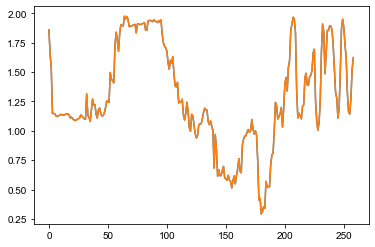

In [251]:
plt.plot(r)
plt.plot(nanFreeSeg)

In [252]:
Pxx

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

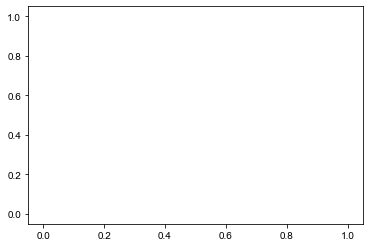

In [253]:
plt.plot(f, Pxx)

In [254]:
max_f = f[np.argmax(Pxx)]
max_f

0.0

In [170]:
mothID

'c-1_m11'

In [249]:
np.isfinite(nanFreeSegment)

NameError: name 'nanFreeSegment' is not defined